<a href="https://colab.research.google.com/github/jatinlala007/Project_6220/blob/main/Project_INSE_6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python Modules**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from scipy.stats import beta
from scipy.stats import f
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
from sklearn.preprocessing import label_binarize

**Upload files into Colaboratory**

In [102]:
#from google.colab import files
#uploaded = files.upload()

In [109]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jatinlala007/Project_6220/main/HCI.csv')
df.head(n=11)

,Country Name,WB Code,POS,EYS,HTS,ASR,HCI (LB),HCI,HCI (UB),Class
0,Afghanistan,AFG,0.94,8.9,355,0.79,0.39,0.40,0.41,Low income
1,Albania,ALB,0.99,12.9,434,0.93,0.62,0.63,0.64,Upper middle income
2,Algeria,DZA,0.98,11.8,374,0.91,0.53,0.53,0.54,Lower middle income
3,Angola,AGO,0.92,8.1,326,0.73,0.33,0.36,0.39,Lower middle income
4,Antigua and Barbuda,ATG,0.99,13.0,407,0.90,0.58,0.60,0.61,High income
5,Argentina,ARG,0.99,12.9,408,0.89,0.59,0.60,0.61,Upper middle income
6,Armenia,ARM,0.99,11.3,443,0.89,0.57,0.58,0.59,Upper middle income
7,Australia,AUS,1.00,13.6,516,0.95,0.76,0.77,0.78,High income
8,Austria,AUT,1.00,13.4,508,0.94,0.74,0.75,0.76,High income
9,Azerbaijan,AZE,0.98,12.4,416,0.88,0.56,0.58,0.59,Upper middle income


**Checking for null values**

In [110]:
df.dtypes
df.isnull().sum()
# no null values and hence no replacing
#df.fillna(df.mean(),inplace=True)
#df = df.dropna()

Country Name    0
WB Code         0
POS             0
EYS             0
HTS             0
ASR             0
HCI (LB)        0
HCI             0
HCI (UB)        0
Class           0
dtype: int64

**Classes**

In [111]:
#Y= df['Class']
df.drop(['Class','WB Code','Country Name',],axis=1,inplace=True)


**Normalizing the data**

In [112]:
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   POS       174 non-null    float64
 1   EYS       174 non-null    float64
 2   HTS       174 non-null    float64
 3   ASR       174 non-null    float64
 4   HCI (LB)  174 non-null    float64
 5   HCI       174 non-null    float64
 6   HCI (UB)  174 non-null    float64
dtypes: float64(7)
memory usage: 9.6 KB


**Observations and variables**

In [113]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173]
['POS', 'EYS', 'HTS', 'ASR', 'HCI (LB)', 'HCI', 'HCI (UB)']


**Data Visualisation**


*Visualisation of the data using a box plot*

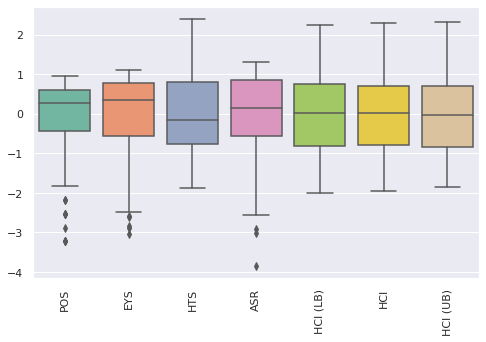

In [114]:
sns.set(rc={'figure.figsize':(8,5)}, font_scale=1)
ax=sns.boxplot(data=df, orient="v", palette="Set2")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

*Visualisation of the data using a Strip plot*

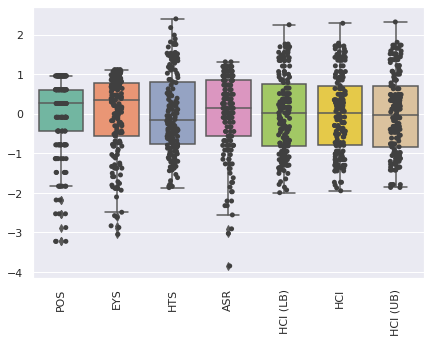

In [115]:
sns.set(rc={'figure.figsize':(7,5)}, font_scale=1)
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

*Visualisation of the data using a pair plot*

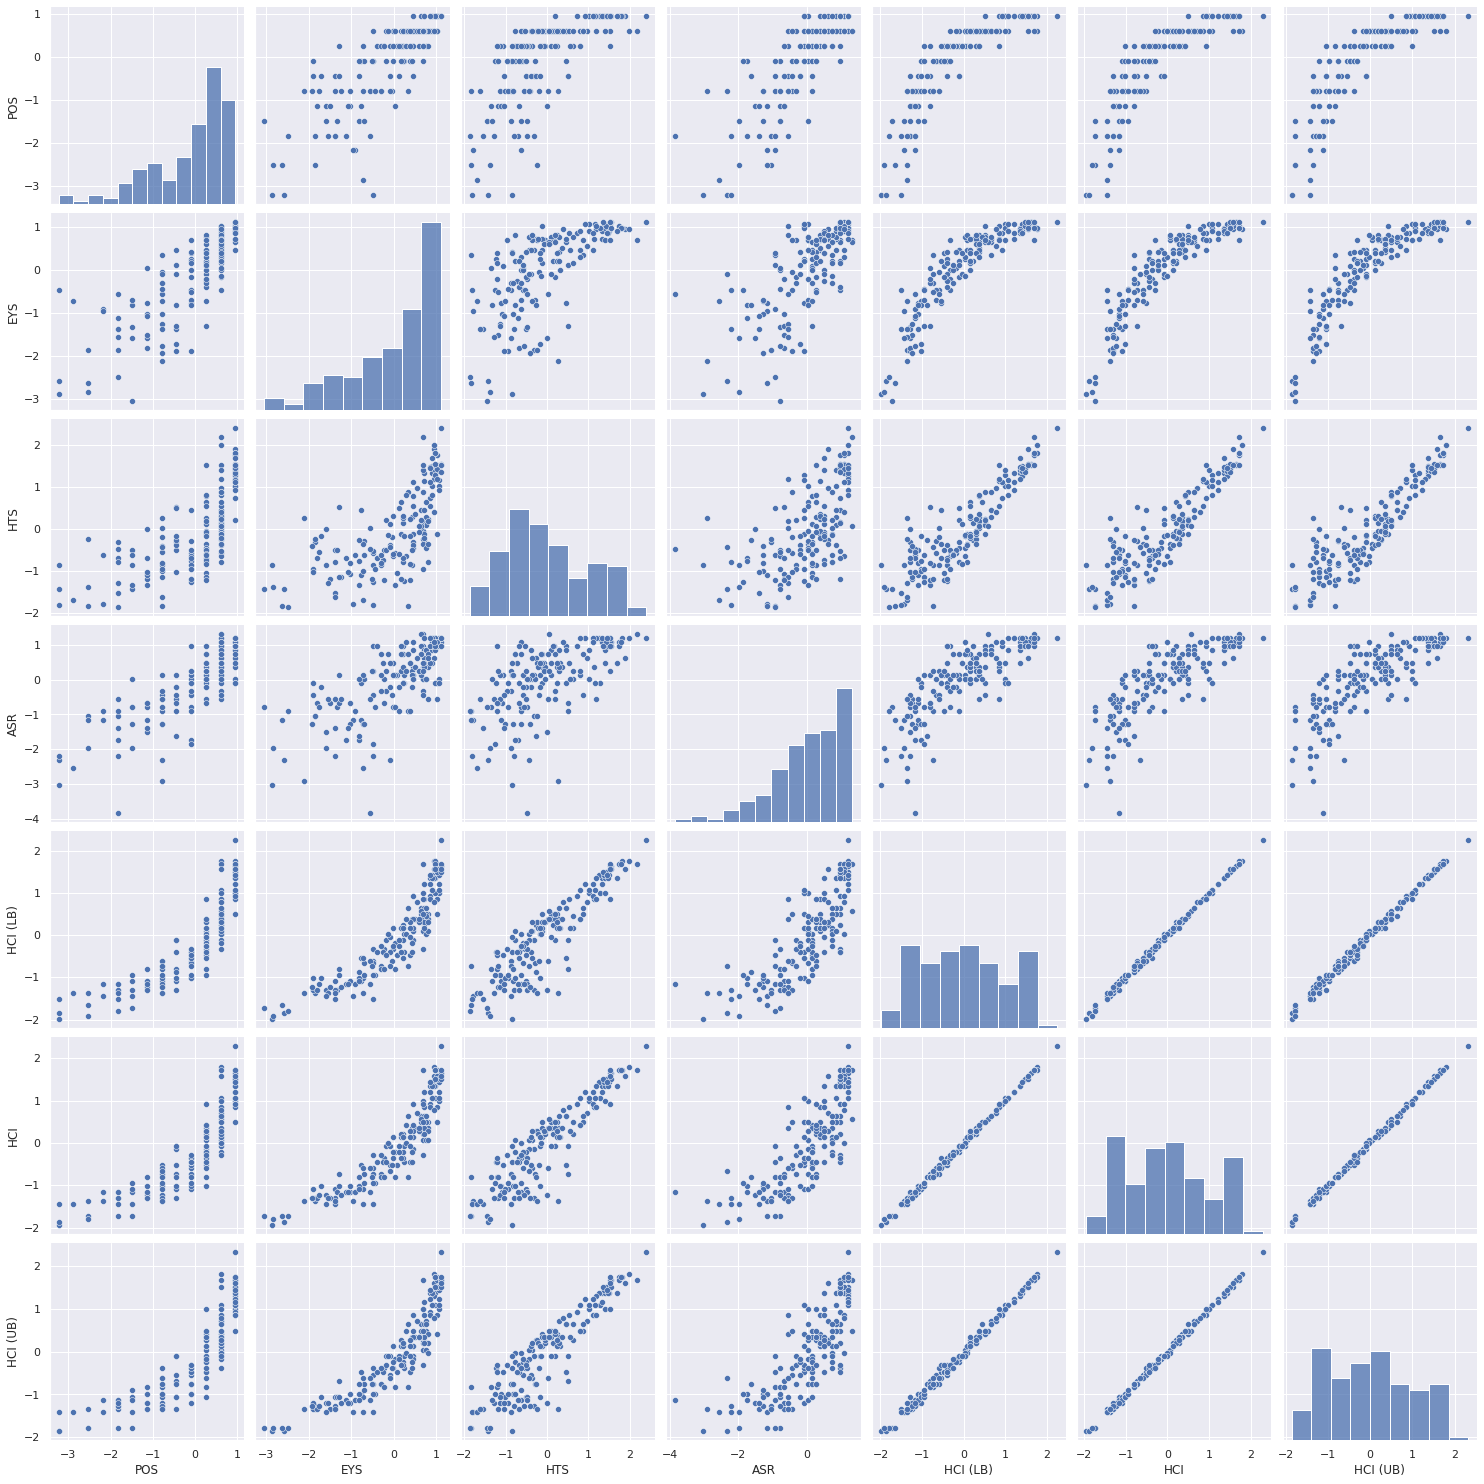

In [116]:
g=sns.pairplot(df,height=3)

**Covariance**

Text(0.5, 1.0, 'Covariance matrix')

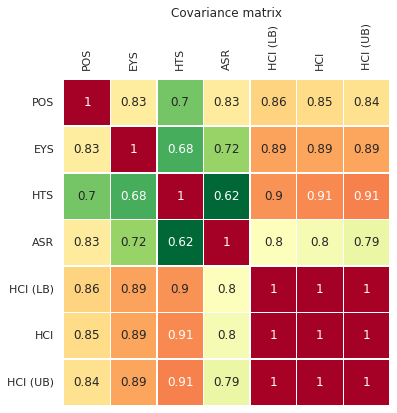

In [117]:
dfc = df - df.mean() #centered data
plt. figure(figsize=(6,6))
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Covariance matrix')

**Principal component analysis**

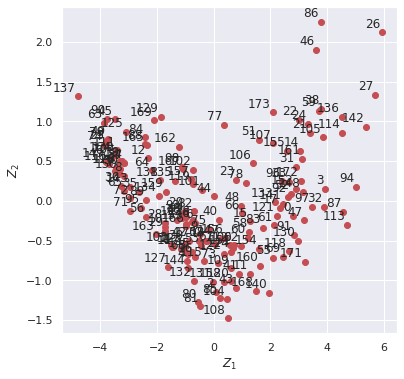

In [118]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)
plt. figure(figsize=(6,6))
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations, Z[:,0], Z[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

**Eigenvectors**

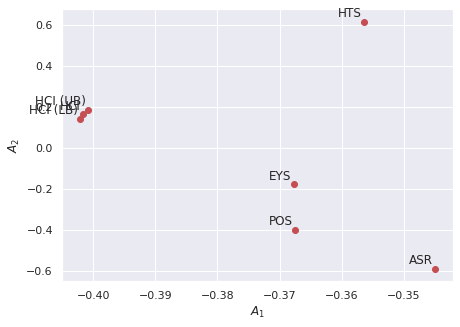

In [119]:
A = pca.components_.T
#print(A.round(4))
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:,0],A[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


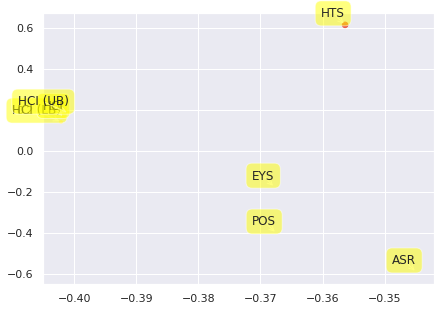

In [120]:
plt. figure()
plt.scatter(A[:,0],A[:,1],marker='o',c=A[:,2],s=A[:,1]*50,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:,0],A[:,1]):
    plt.annotate(label,xy=(x, y), xytext=(0, 5),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

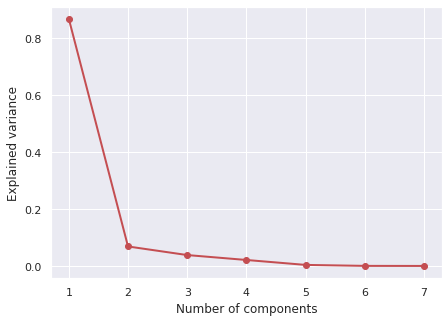

In [121]:
#Eigenvalues
Lambda = pca.explained_variance_
#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained variance**

[86.8  6.8  3.8  2.1  0.4  0.   0. ]


Text(0, 0.5, 'Cumulative explained variance')

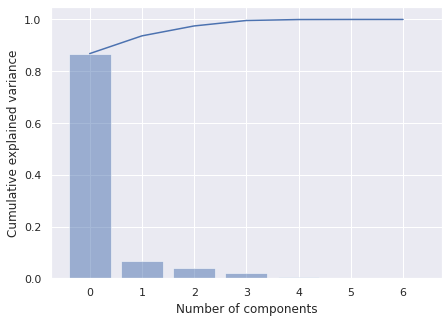

In [122]:
#Explained variance
ell = pca.explained_variance_ratio_
print(ell.round(3)*100)
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

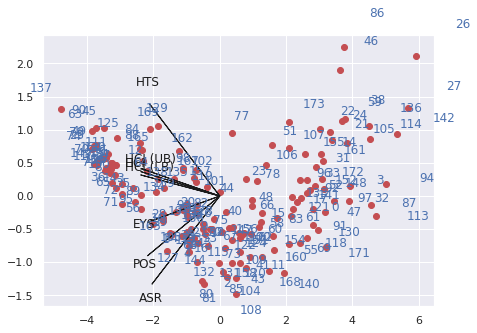

In [123]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='k', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
    
for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='r', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')  

**Principal Components**

Text(0.5, 1.0, 'Principal components')

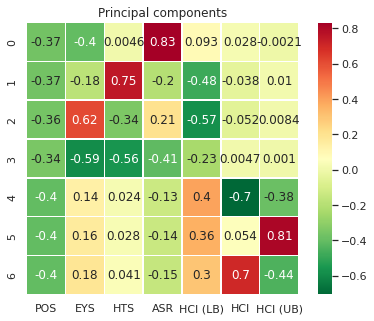

In [124]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=True, 
            square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')

**Hotelling's T2 test**

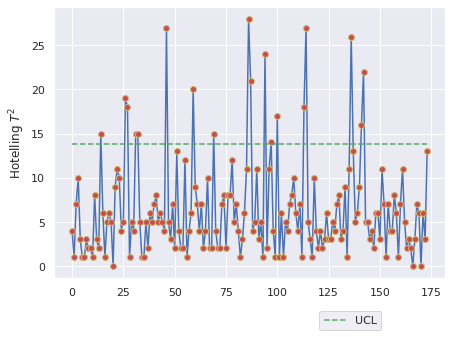

In [125]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda)) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

**Out of control points**

In [126]:
print (np.argwhere(Tsquare>UCL))

[[ 14]
 [ 26]
 [ 27]
 [ 31]
 [ 32]
 [ 46]
 [ 59]
 [ 69]
 [ 86]
 [ 87]
 [ 94]
 [ 97]
 [100]
 [113]
 [114]
 [136]
 [141]
 [142]]


**Control Charts for Principal Components**

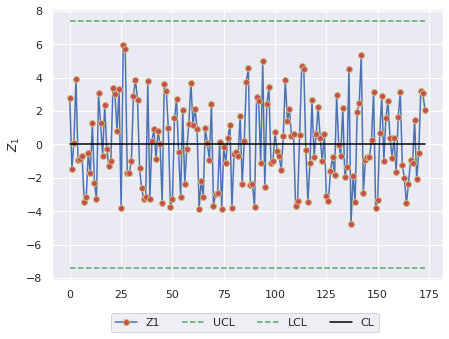

In [127]:
fig, ax = plt.subplots()
ax.plot(Z1,'-b', marker='o', mec='y',mfc='r' , label="Z1")
ax.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label='LCL')
ax.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
plt.ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

**Classification**

In [128]:
#Accuracy of the dataset with two classification algorithms

KNN_model = KNeighborsClassifier(n_neighbors=5)
scoring=['accuracy']
scores_knn_full_data =cross_validate(KNN_model, df,Y,cv=5, scoring=scoring)
scores_knn_Z = cross_validate(KNN_model,Z, Y,cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(KNN_model, Z[:,:2], Y,cv=5, scoring=scoring)

gnb = GaussianNB()
scores_gnb_full_data = cross_validate(gnb, df, Y,cv=5, scoring=scoring)
scores_gnb_Z = cross_validate(gnb, Z, Y,cv=5, scoring=scoring)
scores_gnb_Z12 = cross_validate(gnb, Z[:,:2], Y,cv=5, scoring=scoring)

scores_dict={}
for i in ['fit_time','test_accuracy']:
  scores_dict["gnb_full_data " + i ]=scores_gnb_full_data[i]
  scores_dict["gnb_Z " + i ]=scores_gnb_Z[i]
  scores_dict["gnb_Z12 " + i ]=scores_gnb_Z12[i]
  scores_dict["knn_full_data " + i ]=scores_knn_full_data[i]
  scores_dict["knn_Z " + i ]=scores_knn_Z[i]
  scores_dict["knn_Z12 " + i ]=scores_knn_Z12[i]

scores_data=pd.DataFrame(scores_dict)
print(scores_data)


   gnb_full_data fit_time  gnb_Z fit_time  gnb_Z12 fit_time  \
0                0.003182        0.001806          0.001546   
1                0.002847        0.001523          0.001482   
2                0.002813        0.001445          0.001973   
3                0.002875        0.001500          0.001363   
4                0.002809        0.001496          0.001317   

   knn_full_data fit_time  knn_Z fit_time  knn_Z12 fit_time  \
0                0.003274        0.001274          0.001257   
1                0.002800        0.001293          0.001221   
2                0.002811        0.001312          0.001222   
3                0.003026        0.001247          0.001191   
4                0.002764        0.001275          0.001244   

   gnb_full_data test_accuracy  gnb_Z test_accuracy  gnb_Z12 test_accuracy  \
0                     0.685714             0.685714               0.600000   
1                     0.714286             0.657143               0.685714   
2       

**Confusion Matrix for Naive Bayes**

In [129]:
#Confusion matrix for Naive Bayes classification algorithm
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)
gnb= GaussianNB()
gnb.fit(X_train, y_train)
gnb_prediction=gnb.predict(X_test)
cm=confusion_matrix(gnb_prediction, y_test)
cm_df=pd.DataFrame(cm,index=['Low income','Lower middle income','Upper middle income','High income'],
                  columns=['Low income','Lower middle income','Upper middle income','High income'])

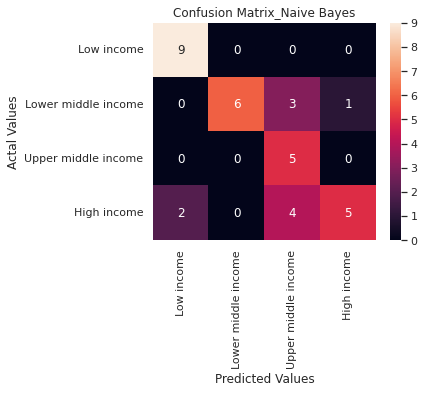

In [130]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix_Naive Bayes')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Confusion Matrix for K-NN**

In [131]:
#Confusion matrix for k-NN classification algorithm
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
cm=confusion_matrix(KNN_prediction, y_test)
cm_df=pd.DataFrame(cm,index=['Low income','Lower middle income','Upper middle income','High income'],
                  columns=['Low income','Lower middle income','Upper middle income','High income'])

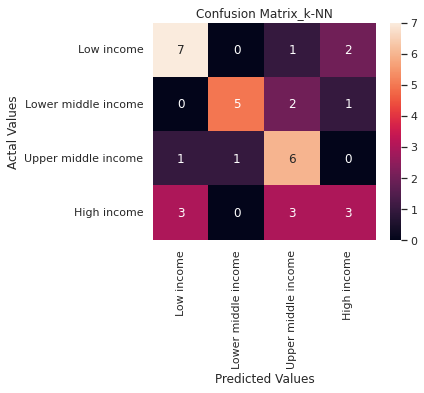

In [132]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix_k-NN')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Bar Chart**

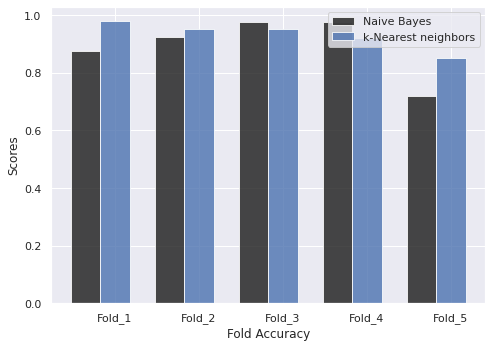

In [133]:
n_groups =5
KNN = (0.98, 0.95, 0.95, 0.92,0.85)
NB = (0.875, 0.925, 0.975, 0.975,0.72)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width,
alpha=opacity,
color='k',
label='Naive Bayes',)

rects2 = plt.bar(index + bar_width,KNN, bar_width,
alpha=opacity,
color='b',
label='k-Nearest neighbors',)

plt.xlabel('Fold Accuracy')
plt.ylabel('Scores')
plt.xticks(index + bar_width, ('Fold_1', 'Fold_2', 'Fold_3', 'Fold_4','Fold_5'))
plt.legend()

plt.tight_layout()
plt.show()